# Análisis del conjunto de datos sobre viviendas en Chicago - E.E.U.U
* ### Es un conjunto de datos bastante pobre con pocas viviendas. Igualmente se puede decir que es buena la base de datos ya que es clara y esta actualizada por una inmobiliaria.  🔼

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Precios-casas-en-chicago.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [3]:
data.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


* ### Contiene 157 filas y 9 columnas. son todos valores numericos.
----

----
* ### Traduciremos los nombre de las columnas al castellano asi es mas legible.

In [4]:
data = data.rename(columns={"Price":"precio" , "Bedroom":"dormitorios","Space":"tamaño_pies_cuadrados",
                            "Room":"habitaciones","Lot":"ancho_lote","Tax":"impuesto","Bathroom":"baños",
                            "Garage":"garaje","Condition":"estado_de_vivienda"})

In [5]:
#### Vemos nuevamente para ver como quedo el data set.
data.head()

,precio,dormitorios,tamaño_pies_cuadrados,habitaciones,ancho_lote,impuesto,baños,garaje,estado_de_vivienda
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [6]:
data.describe()

,precio,dormitorios,tamaño_pies_cuadrados,habitaciones,ancho_lote,impuesto,baños,garaje,estado_de_vivienda
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


* ## Hacemos una descripción sobre los datos numericos que contiene el dataset.
   * #### Media de Precio es de 56.47 - Minimo de 32 - Maximo de 90
   * #### Media de Dormitorios es de 3 - Minimo de 1 - Maximo de 8 
   * #### Media de Tamaños por pies cuadrado es de 1097 - Minimo de 539 - Maximo de 2295 
   * #### Media de Habitaciones es de 6.5 - Minimo de 4 - Maximo de 12  
   * #### Media de Ancho de lote es de 32.80 - Minimo de 24 - Maximo de 50 
   * #### Media de Impuesto es de 911.70 - Minimo de 418 - Maximo de 2752 
   * #### Media de cantidad de baños es de 1.5 - Minimo de 1 - Maximo de 3 
   * #### Media de Garaje es de 0.8 - Minimo de 0 - Maximo de 2 
   * #### Media sobre los Estados de las viviendas es de 0.23 - Minimo de 0 - Maximo de 1 
       * Es decir que el valor = 1 es bueno y los valores = 0 malos.
----


---
* ## Ahora graficaremos para entender mejor los datos y ver como se comportan

<AxesSubplot:xlabel='estado_de_vivienda', ylabel='Count'>

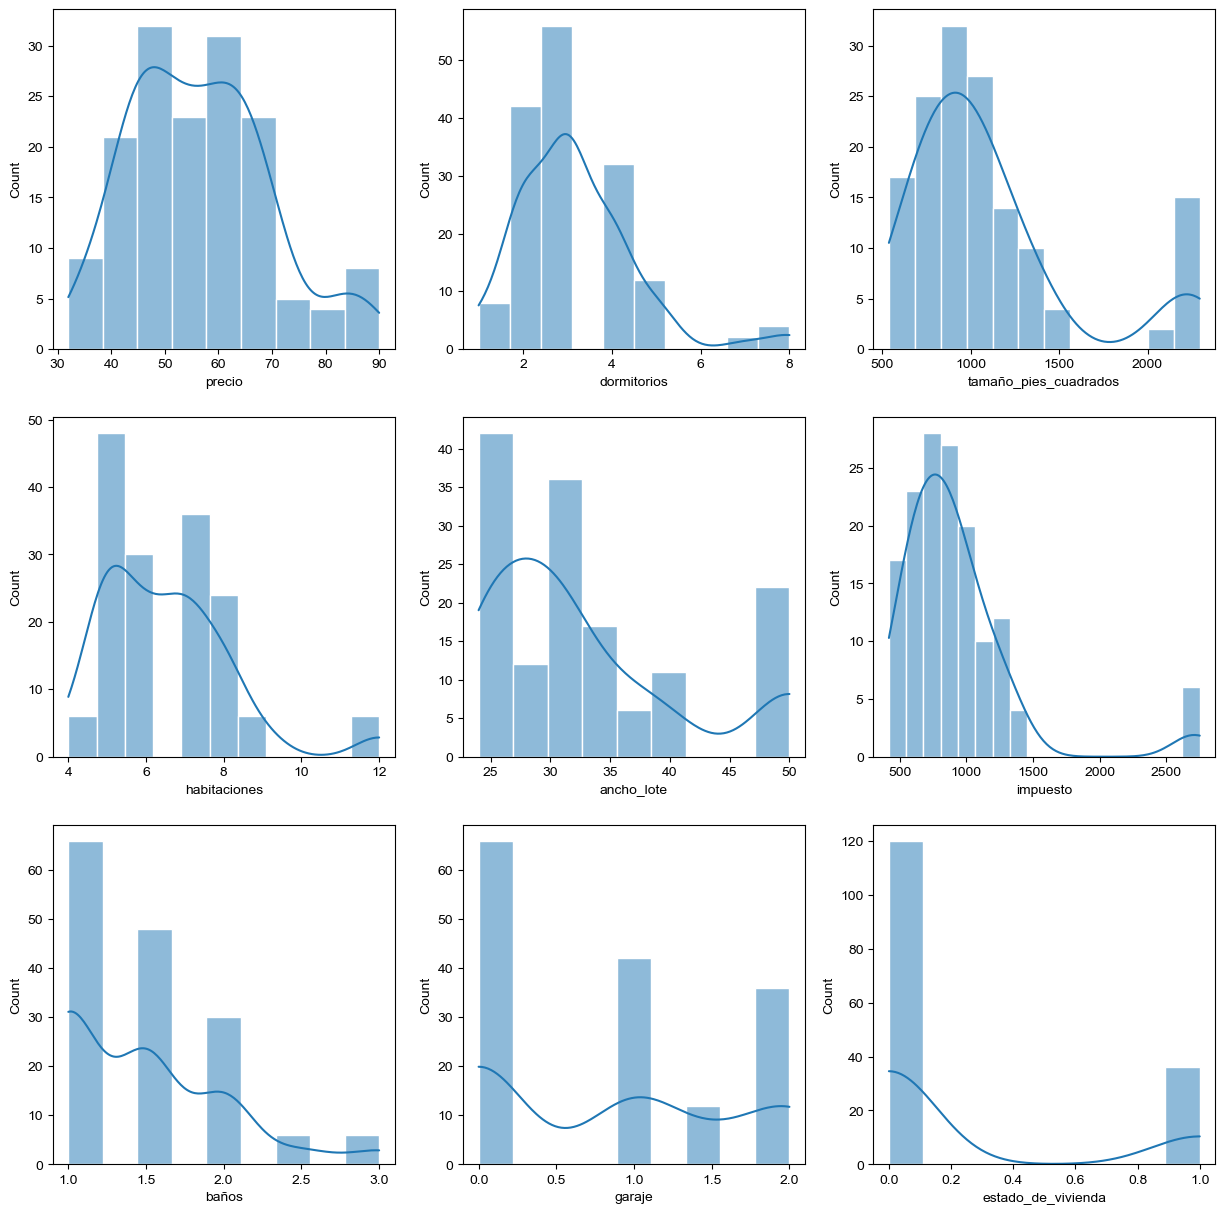

In [7]:
import seaborn as sns

#Creamos una series (subplot) de graficos para que esten todos juntos
fig,ax = plt.subplots(3,3,figsize=(15,15))
sns.set(font_scale =1)
sns.histplot(data['precio'],kde=True,ax=ax[0,0])
sns.histplot(data['dormitorios'],kde=True,ax=ax[0,1])
sns.histplot(data['tamaño_pies_cuadrados'],kde=True,ax=ax[0,2])
sns.histplot(data['habitaciones'],kde=True,ax=ax[1,0])
sns.histplot(data['ancho_lote'],kde=True,ax=ax[1,1])
sns.histplot(data['impuesto'],kde=True,ax=ax[1,2])
sns.histplot(data['baños'],kde=True,ax=ax[2,0])
sns.histplot(data['garaje'],kde=True,ax=ax[2,1])
sns.histplot(data['estado_de_vivienda'],kde=True,ax=ax[2,2])

-----

In [8]:
### Para ver si contiene  valores N/A
print(data.isna().sum())
### que nos diga cuantas filas y columnas componen el dataset
print(f"Numeros de filas{data.shape}columnas")

precio                    1
dormitorios               1
tamaño_pies_cuadrados    11
habitaciones              1
ancho_lote               11
impuesto                 10
baños                     1
garaje                    1
estado_de_vivienda        1
dtype: int64
Numeros de filas(157, 9)columnas


* ### Podemos observar que tenemos vario valores nulos, pero no creo que difiera mucho sobre el análisis y la predicción que hagamos.
     * ### Lo que si vamos a tener que reemplazar los valores NaN con 0 para no interferir mucho enlas predicciones y en el análisis.
---

In [36]:
data.fillna(0,inplace=True)

----
* ## Para entender también un poco mejor los datos veremos su correlaciones

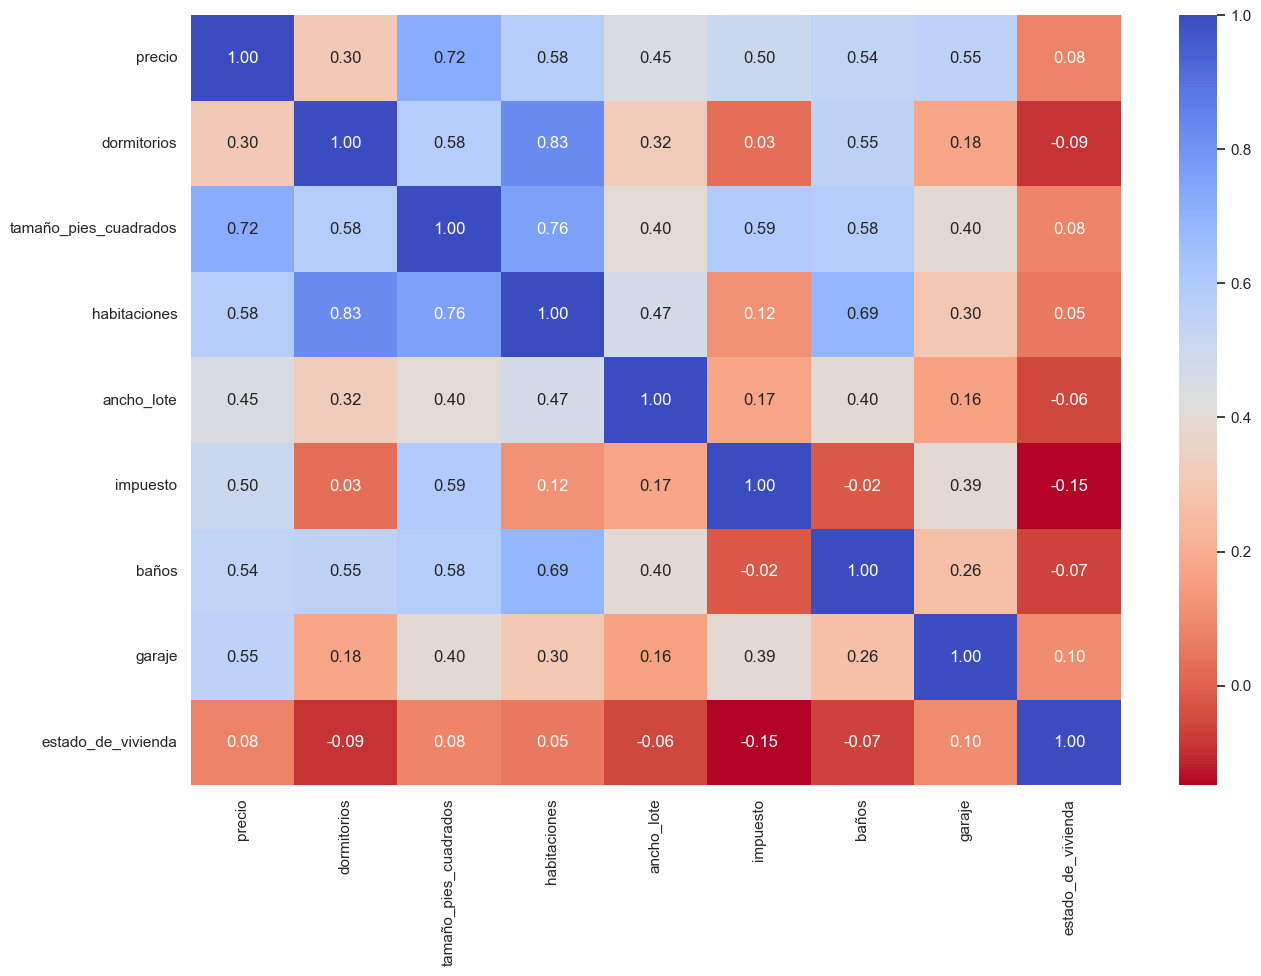

In [11]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt='.2f' , cmap=plt.cm.coolwarm_r)
plt.show()


* ## Vemos correlaciones muy buenas.(Ponemos las primeras 3 por que casi todas tienen una buena correlación)
    * #### Precios - Tamaño pies cuadrados = 72
    * #### Habitaciones - Dormitorios = 83
    * #### Habitaciones - Tamaño pies cuadrados = 76
----

* ## Ahora crearemos algunos gráficos para saber como se distribuyen los datos. Es decir comparar con la vivienda que es buena o mala 

<AxesSubplot:xlabel='dormitorios', ylabel='estado_de_vivienda'>

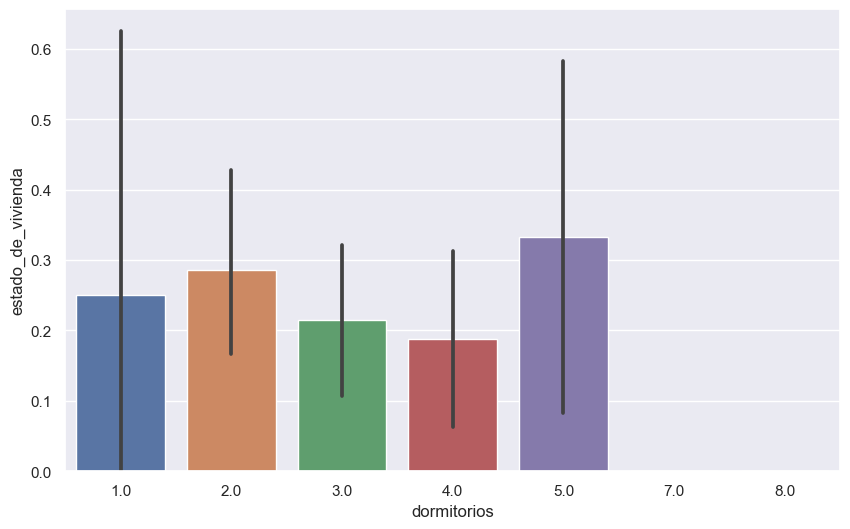

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'dormitorios', y = 'estado_de_vivienda', data = data)

* ## Se puede observar que si contiene 7 u 8 dormitorios, al parecer es "malo el estado de la vivienda" (puede ser por que es una casa vieja)
------

<AxesSubplot:xlabel='habitaciones', ylabel='estado_de_vivienda'>

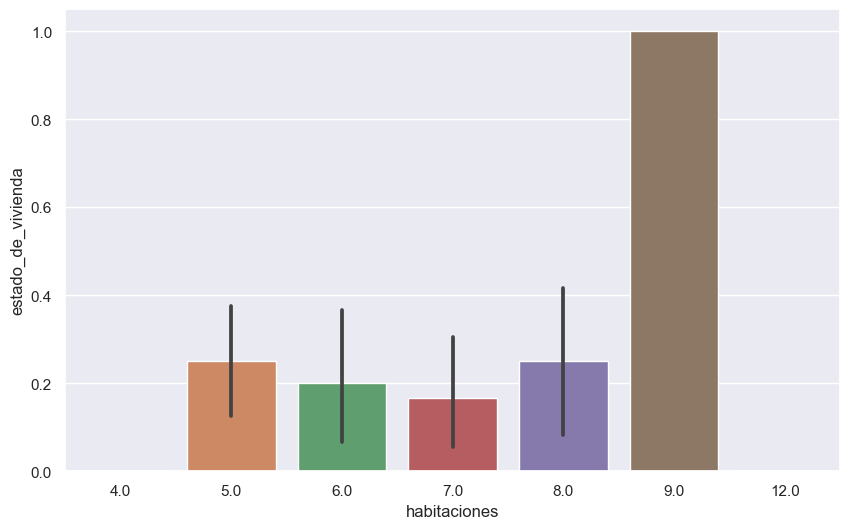

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'habitaciones', y = 'estado_de_vivienda', data = data)

* ## Aquí vemos que las que tienen entre 1 y 4 , y también 12 habitaciones son clasificada como "vivienda en mal estado".
-----

<AxesSubplot:xlabel='baños', ylabel='estado_de_vivienda'>

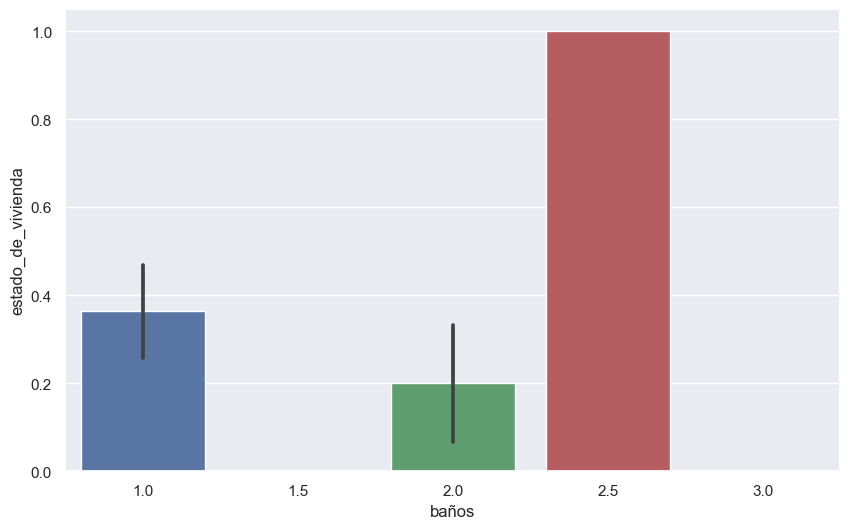

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'baños', y = 'estado_de_vivienda', data = data)

* ## Aca podemos observar que las viviendas con 1 baño y medio u 3 son consideradas "viviendas en mal estado".
---

<AxesSubplot:xlabel='garaje', ylabel='estado_de_vivienda'>

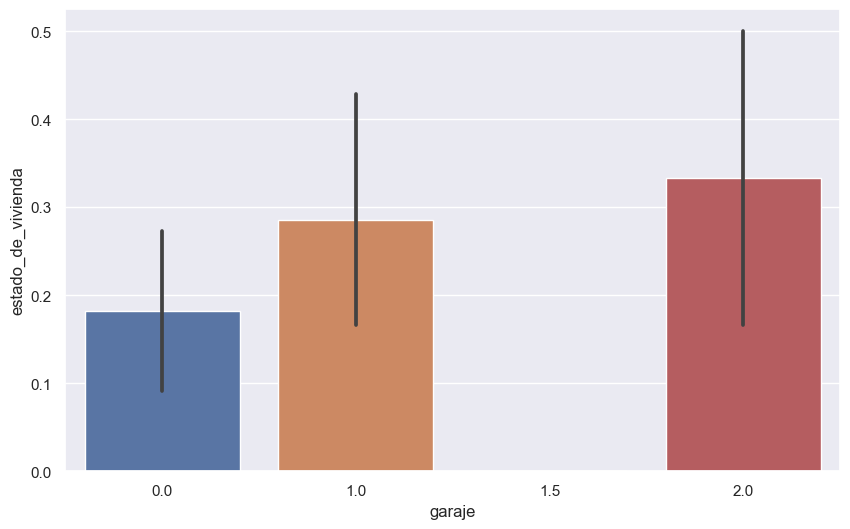

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'garaje', y = 'estado_de_vivienda', data = data)

* ## Se pue ver que solamente tienen consideraciones de "vivienda en mal estado" los que tienen un garaje y medio. Se podria decir que no se podria tener en cuenta este dato.
---

-----
* # REGRESIÓN LINEAL

In [28]:
from sklearn.linear_model import LinearRegression

In [38]:
X = data[["precio","dormitorios","tamaño_pies_cuadrados","habitaciones","ancho_lote","impuesto","baños","garaje"]]
y = data[["estado_de_vivienda"]]

In [39]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [40]:
lm.intercept_ , lm.coef_

(array([0.19559615]),
 array([[ 4.32176169e-03, -1.26917852e-01,  2.09665812e-04,
          1.02362590e-01, -3.59852868e-03, -3.23406017e-04,
         -2.37109542e-01,  5.97185372e-02]]))

In [42]:
lm.score(X,y)*100

18.73794464501203

* ## Con la regresión simple vemos que nos da un resultado casi nulo. solamente un %18,73 de acierto.
    * ### Aplicaremos un RFE para eliminar variables que no aporten mucho al modelo.
----

* # REGRESIÓN LINEAL CON "RFE"

In [44]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [49]:
#el estimador es lineal, asi nos elige las mejores variables para la predicción
estimator =  SVR(kernel="linear")

#Indicar que nos separe entre los grupo de 4 variables posibles
selector = RFE(estimator , n_features_to_select=4 , step=1)
selector = selector.fit(X,y)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

In [50]:
#### Vemos cuales son los 4 mejores
selector.ranking_

array([2, 1, 5, 1, 3, 4, 1, 1])

In [52]:
X1 = X[["dormitorios" , "habitaciones" ,"baños","garaje"]]

In [53]:
lm1=LinearRegression()
lm1.fit(X1,y)

LinearRegression()

In [54]:
lm1.score(X1,y)*100

9.228503592192416

* ## Como podemos ver el resultado empeoro, %9.22 Lo que haremos ahora es separar en modo de entrenamiento y test, Luego ver con otro tipo de modelo.
----

----
* # REGRESIÓN LINEAL (con grupo de entrenamiento y test)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
### creamos y entrenamos el modelo
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [71]:
### Creamos una prediccion con los siguientes datos
y_pred = model.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

##### Resultados
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2 score):", r2)

Error cuadrático medio (MSE): 0.15845833280396956
Coeficiente de determinación (R2 score): 0.15488889171216236


* ## Obtenemos casi el mismo resultado = %15.48. En si empeoro un poquito a comparación de la primera regresión.
    * ### Ahora camibaremos de modelo
----

* # SVR (support vector regressión) con valores normalizados.

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
# Normalizamos los datos para poder hacer el preprocesado
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [80]:
### KERNEL de tipo radial "RBF"
regressor = SVR(kernel="rbf", gamma = 0.1)
regressor.fit(X,y)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=0.1)

In [82]:
#### Ahora en este cambiamos el kernel a tipo polinomio 
regressor_polinomio = SVR(kernel="poly", degree = 3)
regressor_polinomio.fit(X,y)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [85]:
regressor.score(X,y)*100

77.84020713028596

In [84]:
regressor_polinomio.score(X,y)*100

56.3040476898672

* # OBSERVACIÓN DEL SVR CON LOS KERNEL "rbf y poly".
    * ## Vemos una mejora muy buena con la regresion lineal Obtenemos unos resultados bastante buenos. Un SVR de %56.30 con el kernel "POLY" .
    * ## Pero aun mejor con el KERNEL "RBF" con un resultado del %77,84
---

----
* # SVR con kernel "rbf" (grupo de entrenamiento y test)

In [87]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

#Entrenamos el modelo en los datos de entrenamiento
regressor.fit(x_train , y_train)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=0.1)

In [88]:
score_test = regressor.score(x_test , y_test) #Evalúamos el modelo con sus datos de prueba 

In [96]:
print(f"El score en los datos de prueba es de : % {score_test*100:.2f}")

El score en los datos de prueba es de : % 65.71


In [94]:
####Evalúamos el modelo en los datos de entrenamiento y vemos su resultado.
score_train = regressor.score(x_train , y_train) 
print(f"Eficacia del modelo con los datos de entrenamiento son de: %{score_train*100:.2f}")

Eficacia del modelo con los datos de entrenamiento son de: %74.24


---
# Por el momento es un resultado bastante bueno tener %77,84 para el modelo de SVR y también una eficacia del %74,24 en los datos de entrenamiento. Son valores bastante positivos.  Para mañana intentaremos mejorar con varios modelos mas 
## Martes - 6/6/2023
----